https://nbviewer.jupyter.org/github/yenlung/nccu-jupyter-math/blob/master/1082%20%E6%95%B8%E5%AD%B8%E8%BB%9F%E9%AB%94%E6%87%89%E7%94%A8/01a%20%E4%BD%9C%E6%A5%AD.ipynb

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
## 讀入 Tensorflow

In [3]:
from tensorflow.keras.datasets import fashion_mnist

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [5]:
len(x_train)

60000

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

這是 Bag


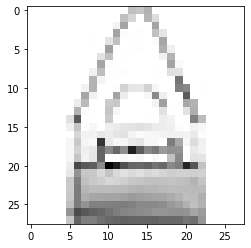

In [7]:
n = 887
print('這是', class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Greys');

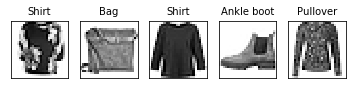

In [8]:
pick = np.random.choice(60000, 5, replace=False)

for i in range(5):
    n = pick[i]
    ax = plt.subplot(151+i)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[y_train[n]], fontsize=10)
    plt.imshow(x_train[n], cmap='Greys')  

In [9]:
x_train = x_train/255
x_test = x_test/255

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
x_train = x_train.reshape(60000, 784)

In [12]:
y_train.shape

(60000,)

In [13]:
x_test = x_test.reshape(10000, 784)

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
y_train = to_categorical(y_train, 10)

In [16]:
y_test = to_categorical(y_test, 10)

In [17]:
y_train[n]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [19]:
model = Sequential()

In [20]:
model.add(Dense(300, input_dim = 784, activation='sigmoid'))

In [21]:
model.add(Dense(200, activation='relu'))

In [22]:
model.add(Dense(87, activation='relu'))

In [23]:
model.add(Dense(10, activation='softmax'))

In [24]:
## 組裝我們的神經網路

In [25]:
model.compile(loss='mse', optimizer=SGD(lr=0.087), metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_2 (Dense)              (None, 87)                17487     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                880       
Total params: 314,067
Trainable params: 314,067
Non-trainable params: 0
_________________________________________________________________


In [27]:
## 訓練

In [28]:
model.fit(x_train, y_train, batch_size=150, epochs=15)

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0891 - accuracy: 0.2684
Epoch 2/15
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0855 - accuracy: 0.3762
Epoch 3/15
60000/60000 [==============================] - 3s 46us/sample - loss: 0.0796 - accuracy: 0.4026
Epoch 4/15
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0702 - accuracy: 0.4914
Epoch 5/15
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0594 - accuracy: 0.6292
Epoch 6/15
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0502 - accuracy: 0.6907
Epoch 7/15
60000/60000 [==============================] - 4s 60us/sample - loss: 0.0442 - accuracy: 0.7140
Epoch 8/15
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0405 - accuracy: 0.7293
Epoch 9/15
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0380 - accuracy: 0.7405
Epoch 10/15
60

In [29]:
## 成果

In [30]:
result = model.predict_classes(x_test)

In [31]:
result

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

神經網路預測這是 Ankle boot


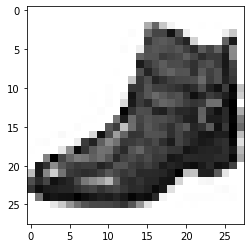

In [32]:
n = 1440
print("神經網路預測這是",class_names[result[n]])
plt.imshow(x_test[n].reshape(28,28), cmap='Greys')

參考資料
https://medium.com/life-of-small-data-engineer/%E7%82%BA%E4%BB%80%E9%BA%BC%E6%B7%B1%E5%BA%A6%E5%AD%B8%E7%BF%92%E6%A8%A1%E5%9E%8B%E6%BA%96%E7%A2%BA%E7%8E%87%E4%B8%8D%E6%9C%83%E6%8F%90%E6%98%87-f6445ef7ae47